In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = torch.linspace(1,50,50).reshape(-1,1)


In [3]:
torch.manual_seed(71)
e = torch.randint(-8,9,(50,1),dtype=torch.float)


In [4]:
y = 2*X + 1 + e
print(y.shape)

torch.Size([50, 1])


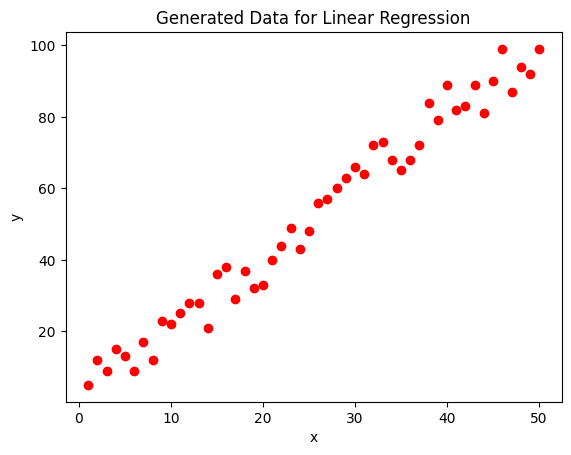

In [5]:
plt.scatter(X.numpy(), y.numpy(),color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data for Linear Regression')
plt.show()

In [6]:
torch.manual_seed(59)

model = nn.Linear(1, 1)
print('Weight:', model.weight.item())
print('Bias:  ', model.bias.item())

Weight: 0.10597813129425049
Bias:   0.9637961387634277


In [7]:
loss_function = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [8]:
epochs = 50
losses = []

for epoch in range(1, epochs + 1):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = loss_function(y_pred, y)
    losses.append(loss.item())

    loss.backward()
    optimizer.step()
    print(f'epoch: {epoch:2}  loss: {loss.item():10.8f}  '
          f'weight: {model.weight.item():10.8f}  '
          f'bias: {model.bias.item():10.8f}')


epoch:  1  loss: 3057.21679688  weight: 3.33490014  bias: 1.06046367
epoch:  2  loss: 1588.53063965  weight: 1.01483285  bias: 0.99226284
epoch:  3  loss: 830.29992676  weight: 2.68179941  bias: 1.04252183
epoch:  4  loss: 438.85217285  weight: 1.48402131  bias: 1.00766504
epoch:  5  loss: 236.76144409  weight: 2.34460592  bias: 1.03396463
epoch:  6  loss: 132.42912292  weight: 1.72622538  bias: 1.01632178
epoch:  7  loss: 78.56572723  weight: 2.17050409  bias: 1.03025162
epoch:  8  loss: 50.75775909  weight: 1.85124576  bias: 1.02149546
epoch:  9  loss: 36.40123367  weight: 2.08060074  bias: 1.02903891
epoch: 10  loss: 28.98922920  weight: 1.91576838  bias: 1.02487016
epoch: 11  loss: 25.16238213  weight: 2.03416562  bias: 1.02911627
epoch: 12  loss: 23.18647385  weight: 1.94905841  bias: 1.02731562
epoch: 13  loss: 22.16612625  weight: 2.01017213  bias: 1.02985907
epoch: 14  loss: 21.63911057  weight: 1.96622372  bias: 1.02928054
epoch: 15  loss: 21.36677170  weight: 1.99776423  bias

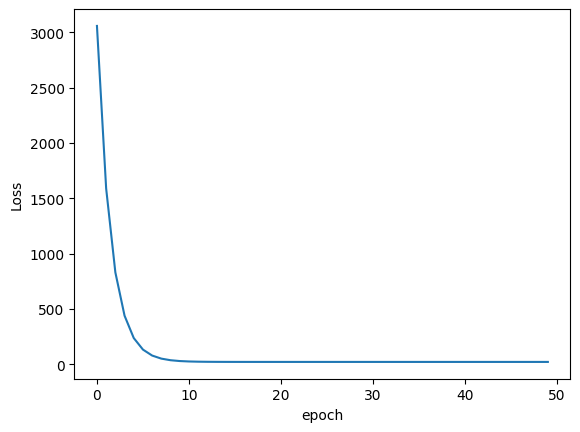

In [9]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');
plt.show()

In [10]:
x1 = torch.tensor([X.min().item(), X.max().item()])

w1, b1 = model.weight.item(), model.bias.item()

y1 = x1 * w1 + b1


In [11]:
print(f'Final Weight: {w1:.8f}, Final Bias: {b1:.8f}')
print(f'X range: {x1.numpy()}')
print(f'Predicted Y values: {y1.numpy()}')

Final Weight: 1.98381913, Final Bias: 1.05575156
X range: [ 1. 50.]
Predicted Y values: [  3.0395708 100.246704 ]


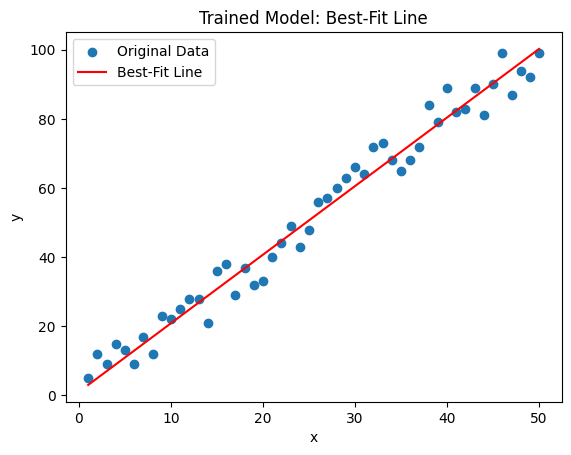

In [12]:
plt.scatter(X.numpy(), y.numpy(), label="Original Data")
plt.plot(x1.numpy(), y1.numpy(), 'r', label="Best-Fit Line")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trained Model: +Best-Fit Line')
plt.legend()
plt.show()

In [13]:
torch.save(model.state_dict(),'SHABREENA VINCENT 212222230141')